In [1]:
import sys
sys.path.append('../utils/')
from pitch_detectors import *
from signal_manager import *
from scipy.io import wavfile


## Pitch Detection on actual signal

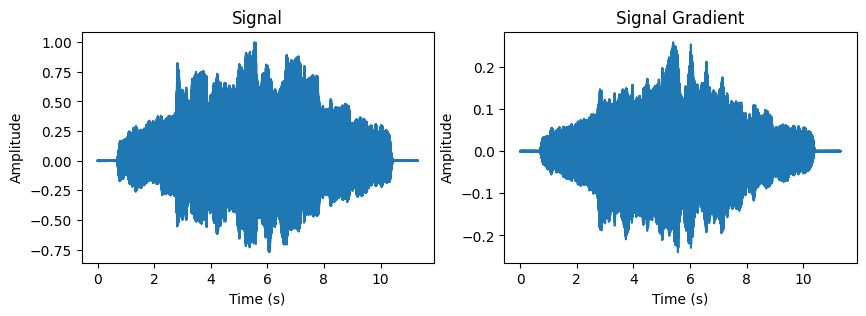

In [2]:
samplerate, signal = wavfile.read('../data/VocalSet/FULL/female1/scales/belt/f1_scales_belt_a.wav')
signal = signal/np.max(signal)
visualize_signal(signal, samplerate)

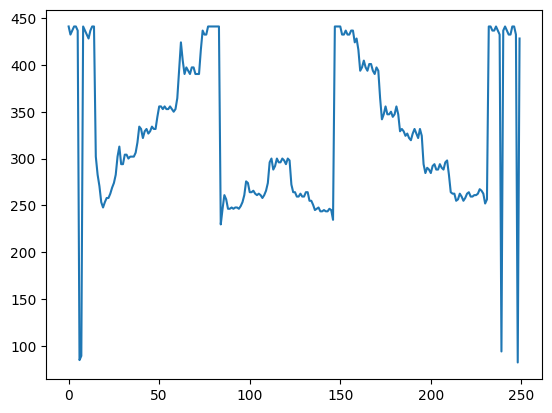

In [3]:
pitch, full_acs = pitch_detection(signal, samplerate, 2001, method='ac')
plt.figure()
plt.plot(pitch)

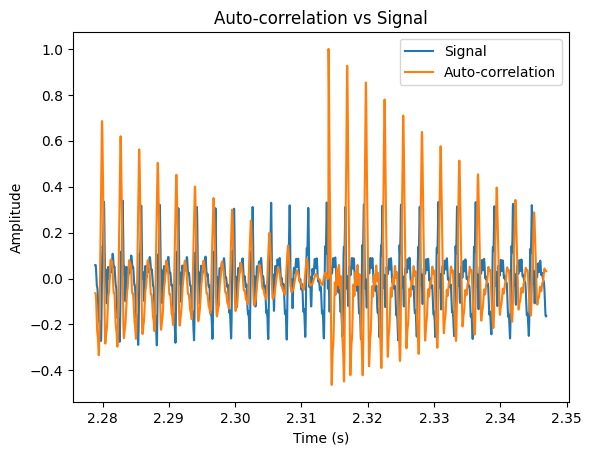

In [4]:
visualize_signal(signal, samplerate, ac_s = full_acs, window_size = 3000, window_start=100500)

## Librosa implementation of YIN's method

In [5]:
from librosa import yin

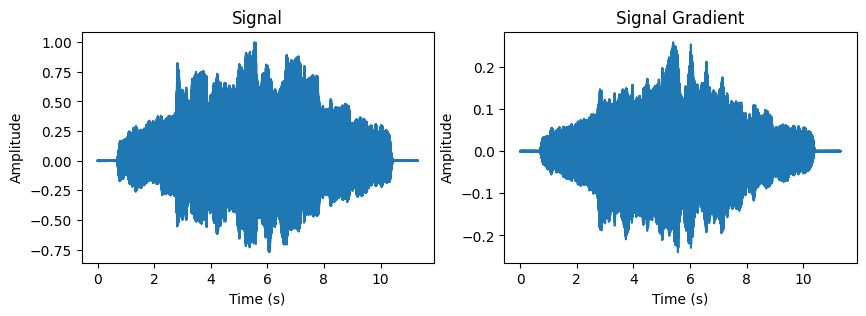

In [6]:
samplerate, signal = wavfile.read('../data/VocalSet/FULL/female1/scales/belt/f1_scales_belt_a.wav')
signal = signal/np.max(signal)
visualize_signal(signal, samplerate)

Frame size for 20ms, with sample rate of 44100 Hz is: 882 samples


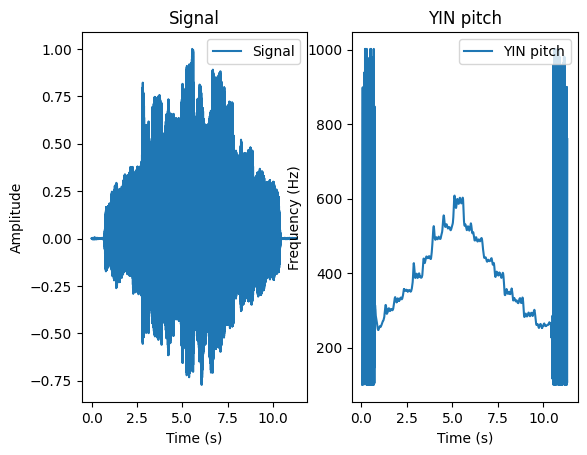

In [7]:
frame_size = int(2e-2 * samplerate) # framsize of 20ms (nearest integer)
print('Frame size for 20ms, with sample rate of', samplerate, 'Hz is:', frame_size, 'samples')
pitch_yin = yin(signal, fmin=80, fmax=1000, sr=samplerate, frame_length=frame_size)
visualize_signal(signal, samplerate, yin_pitch=pitch_yin)

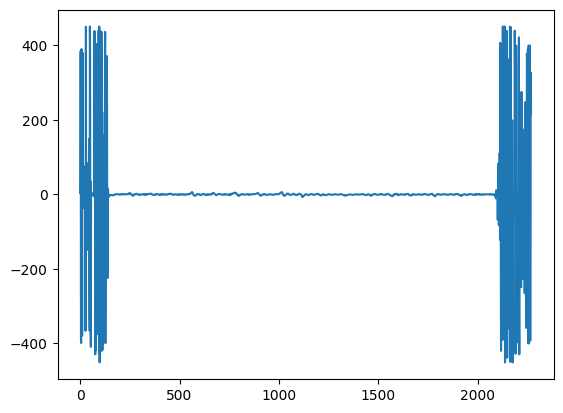

In [8]:
plt.plot(np.gradient(pitch_yin))